In [2]:
import tensorflow as tf

In [4]:
# for loading/processing the images  
from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing.image import img_to_array 
from tensorflow.keras.applications.vgg16 import preprocess_input 

# models 
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [6]:
path='/Users/suminbae_2/Desktop/archive/flower_images/flower_images'

In [7]:
os.chdir(path)

In [8]:
flowers = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            flowers.append(file.name)

In [42]:
len(flowers)

210

In [10]:
img = load_img(flowers[0], target_size=(224,224))

In [11]:
img = np.array(img)

print(img.shape)

(224, 224, 3)


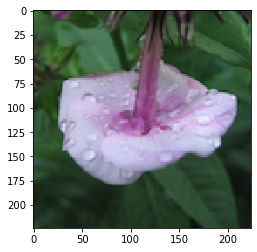

In [41]:
plt.imshow(img)

In [12]:
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)

(1, 224, 224, 3)


In [13]:
x = preprocess_input(reshaped_img)

In [14]:
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

553467904/553467096 [==============================] - 77s 0us/step


In [16]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [17]:
data = {}
# p = r"E:\Documents\My Projects\Instagram Dashboard\Model Development\flower_features.pkl"

# lop through each image in the dataset
for flower in flowers:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(flower,model)
        data[flower] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)
          
 
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat.shape
(210, 1, 4096)

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape
(210, 4096)

# get the unique labels (from the flower_labels.csv)
df = pd.read_csv('flower_labels.csv')
label = df['label'].tolist()
unique_labels = list(set(label))

In [21]:
feat.shape

(210, 4096)

In [22]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [24]:
x.shape

(210, 100)

In [25]:
kmeans = KMeans(n_clusters=len(unique_labels),n_jobs=-1, random_state=22)
kmeans.fit(x)

/Users/suminbae_2/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=10, n_jobs=-1, random_state=22)

In [26]:
kmeans.labels_


array([4, 2, 2, 2, 1, 0, 9, 2, 4, 4, 8, 5, 6, 5, 2, 0, 7, 0, 6, 4, 4, 1,
       7, 9, 5, 7, 6, 4, 0, 6, 4, 9, 1, 6, 1, 4, 4, 1, 6, 2, 6, 2, 0, 6,
       4, 3, 1, 4, 3, 1, 6, 5, 3, 2, 4, 2, 7, 4, 2, 4, 0, 6, 1, 3, 2, 2,
       0, 4, 4, 4, 3, 1, 2, 5, 7, 4, 1, 6, 2, 1, 4, 5, 3, 2, 3, 0, 4, 6,
       1, 3, 1, 2, 3, 6, 4, 7, 0, 2, 0, 3, 5, 4, 5, 7, 4, 7, 9, 9, 4, 7,
       4, 4, 6, 2, 3, 7, 0, 0, 0, 5, 4, 2, 2, 1, 6, 3, 0, 2, 3, 1, 1, 1,
       2, 7, 1, 9, 6, 2, 2, 4, 7, 7, 6, 6, 4, 1, 7, 4, 3, 5, 2, 2, 5, 4,
       0, 2, 4, 1, 2, 9, 2, 9, 6, 1, 2, 6, 1, 6, 1, 2, 7, 4, 5, 5, 0, 1,
       0, 1, 7, 7, 6, 5, 1, 1, 9, 4, 0, 6, 4, 7, 5, 2, 3, 0, 8, 2, 3, 4,
       4, 6, 7, 2, 4, 7, 2, 4, 6, 4, 4, 3], dtype=int32)

In [27]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [30]:
groups[0]

['0139.png',
 '0106.png',
 '0113.png',
 '0102.png',
 '0061.png',
 '0039.png',
 '0164.png',
 '0003.png',
 '0027.png',
 '0190.png',
 '0179.png',
 '0151.png',
 '0145.png',
 '0021.png',
 '0087.png',
 '0127.png',
 '0132.png',
 '0122.png',
 '0094.png']

In [36]:
groups[0][0]

'0139.png'

In [39]:
i = np.array(groups[0][0])